<a href="https://colab.research.google.com/github/Jafrin07/Delhi-Air-Quality-Index-AQI-Prediction/blob/main/Air_Quality_Index_Prediction_Project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Step 1: Import Libraries

In [15]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

import warnings
warnings.filterwarnings("ignore")

# Set style
sns.set(style="whitegrid")

Step 2: Load Dataset (Delhi AQI CSV)

In [16]:
df=pd.read_csv("/content/drive/MyDrive/AQI project/delhi_aqi.csv")
df

,date,co,no,no2,o3,so2,pm2_5,pm10,nh3
0,2020-11-25 01:00:00,2616.88,2.18,70.60,13.59,38.62,364.61,411.73,28.63
1,2020-11-25 02:00:00,3631.59,23.25,89.11,0.33,54.36,420.96,486.21,41.04
2,2020-11-25 03:00:00,4539.49,52.75,100.08,1.11,68.67,463.68,541.95,49.14
3,2020-11-25 04:00:00,4539.49,50.96,111.04,6.44,78.20,454.81,534.00,48.13
4,2020-11-25 05:00:00,4379.27,42.92,117.90,17.17,87.74,448.14,529.19,46.61
...,...,...,...,...,...,...,...,...,...
18771,2023-01-24 04:00:00,1762.39,4.64,37.01,33.26,30.52,231.15,289.84,6.27
18772,2023-01-24 05:00:00,1735.69,6.82,34.96,46.49,34.33,225.08,280.52,9.12
18773,2023-01-24 06:00:00,1922.61,8.16,40.10,56.51,43.39,242.49,296.07,12.54
18774,2023-01-24 07:00:00,1361.85,9.05,52.78,71.53,100.14,165.67,191.82,7.47


In [5]:
# Preview data
df.head()

,date,co,no,no2,o3,so2,pm2_5,pm10,nh3
0,2020-11-25 01:00:00,2616.88,2.18,70.60,13.59,38.62,364.61,411.73,28.63
1,2020-11-25 02:00:00,3631.59,23.25,89.11,0.33,54.36,420.96,486.21,41.04
2,2020-11-25 03:00:00,4539.49,52.75,100.08,1.11,68.67,463.68,541.95,49.14
3,2020-11-25 04:00:00,4539.49,50.96,111.04,6.44,78.20,454.81,534.00,48.13
4,2020-11-25 05:00:00,4379.27,42.92,117.90,17.17,87.74,448.14,529.19,46.61


Step 3: Data Cleaning and Preprocessing

In [21]:
# Standardize column names
df.columns = [col.strip().lower().replace(" ", "_") for col in df.columns]
print("Columns:", df.columns.tolist())

# Drop unnecessary columns (like dates, locations if present)
drop_cols = ['location', 'date', 'station']  # adjust as needed
df.drop([col for col in drop_cols if col in df.columns], axis=1, inplace=True)

# Display top rows
df.head()

Columns: ['date', 'co', 'no', 'no2', 'o3', 'so2', 'pm2_5', 'pm10', 'nh3']


,co,no,no2,o3,so2,pm2_5,pm10,nh3
0,2616.88,2.18,70.60,13.59,38.62,364.61,411.73,28.63
1,3631.59,23.25,89.11,0.33,54.36,420.96,486.21,41.04
2,4539.49,52.75,100.08,1.11,68.67,463.68,541.95,49.14
3,4539.49,50.96,111.04,6.44,78.20,454.81,534.00,48.13
4,4379.27,42.92,117.90,17.17,87.74,448.14,529.19,46.61


In [25]:
# Calculate AQI from PM2.5 using CPCB formula

def calculate_aqi_pm25(pm25):
    if pd.isnull(pm25):
        return np.nan
    if 0 <= pm25 <= 30:
        return (50/30) * pm25
    elif 31 <= pm25 <= 60:
        return ((100-51)/(60-31)) * (pm25 - 31) + 51
    elif 61 <= pm25 <= 90:
        return ((200-101)/(90-61)) * (pm25 - 61) + 101
    elif 91 <= pm25 <= 120:
        return ((300-201)/(120-91)) * (pm25 - 91) + 201
    elif 121 <= pm25 <= 250:
        return ((400-301)/(250-121)) * (pm25 - 121) + 301
    elif 251 <= pm25 <= 500:
        return ((500-401)/(500-251)) * (pm25 - 251) + 401
    else:
        return 500

# Apply to column
df['aqi'] = df['pm2_5'].apply(calculate_aqi_pm25)

# Drop rows with missing values
df.dropna(inplace=True)

# Confirm addition
df[['pm2_5', 'aqi']].head()

,pm2_5,aqi
0,364.61,446.170241
1,420.96,468.574458
2,463.68,485.559518
3,454.81,482.032892
4,448.14,479.380964


Step 4: Exploratory Data Analysis

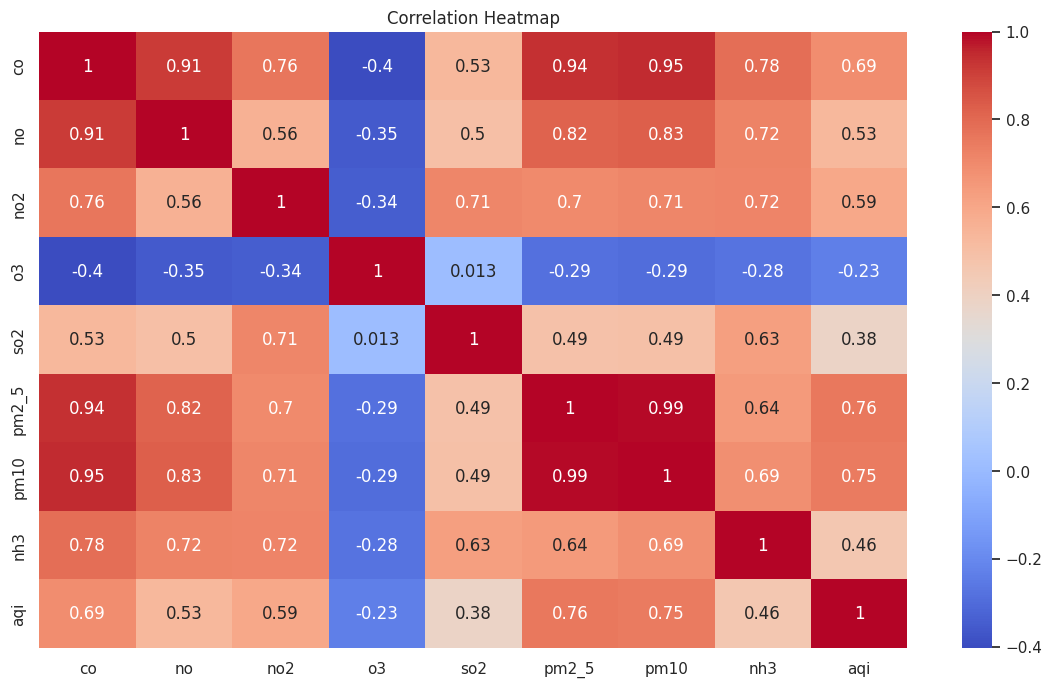

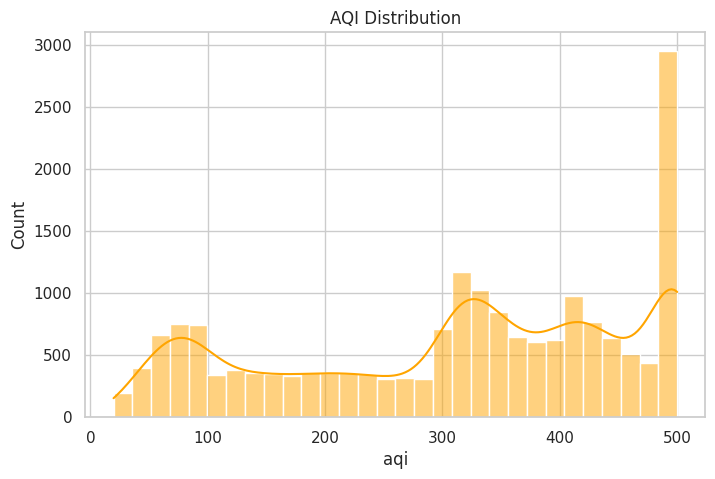

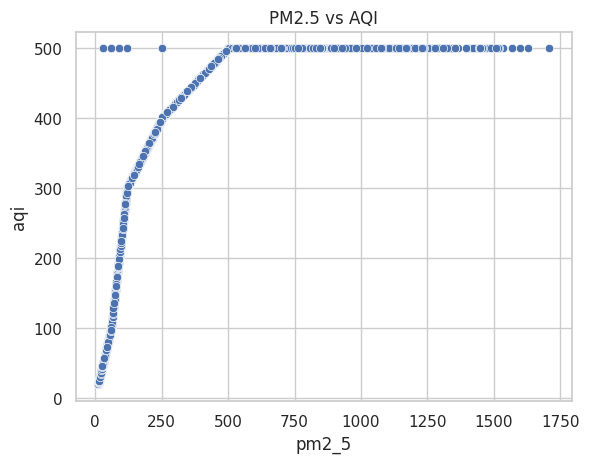

In [27]:
# Correlation matrix
plt.figure(figsize=(14, 8))
sns.heatmap(df.corr(), annot=True, cmap='coolwarm')
plt.title("Correlation Heatmap")
plt.show()

# AQI distribution
plt.figure(figsize=(8, 5))
sns.histplot(df['aqi'], bins=30, kde=True, color='orange')
plt.title("AQI Distribution")
plt.show()

# PM2.5 vs AQI
sns.scatterplot(x='pm2_5', y='aqi', data=df)
plt.title("PM2.5 vs AQI")
plt.show()

Step 5: Feature Selection & Splitting

In [28]:
X = df.drop(['aqi'], axis=1)
y = df['aqi']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

print(f"Training samples: {X_train.shape[0]}, Testing samples: {X_test.shape[0]}")

Training samples: 15020, Testing samples: 3756


Step 6: Train & Evaluate Models

In [29]:
models = {
    'Random Forest': RandomForestRegressor(n_estimators=150, random_state=42),
    'Gradient Boosting': GradientBoostingRegressor(n_estimators=150, random_state=42),
    'Linear Regression': LinearRegression()
}

results = {}

for name, model in models.items():
    model.fit(X_train, y_train)
    preds = model.predict(X_test)

    mae = mean_absolute_error(y_test, preds)
    mse = mean_squared_error(y_test, preds)
    rmse = np.sqrt(mse)
    r2 = r2_score(y_test, preds)

    results[name] = {
        'MAE': round(mae, 2),
        'MSE': round(mse, 2),
        'RMSE': round(rmse, 2),
        'R2 Score': round(r2, 4)
    }

# Display results
results_df = pd.DataFrame(results).T
print("📈 Model Evaluation:")
display(results_df)

📈 Model Evaluation:


,MAE,MSE,RMSE,R2 Score
Random Forest,0.17,14.64,3.83,0.9993
Gradient Boosting,0.85,2.18,1.48,0.9999
Linear Regression,75.71,8469.72,92.03,0.6106


Step 7: Visualize Results

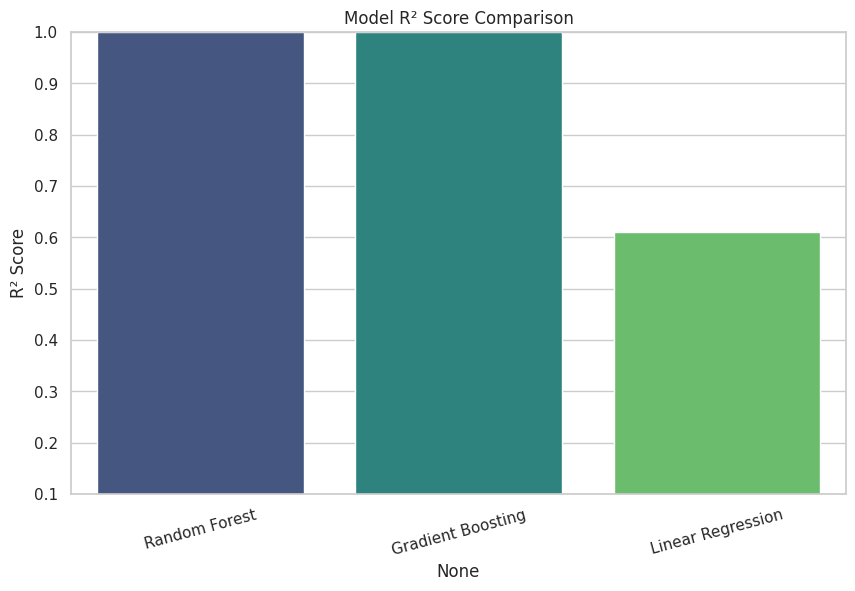

 Best Performing Model: Gradient Boosting


In [32]:
plt.figure(figsize=(10, 6))
sns.barplot(x=results_df.index, y='R2 Score', data=results_df, palette='viridis')
plt.title("Model R² Score Comparison")
plt.ylabel("R² Score")
plt.ylim(0.10, 1)
plt.xticks(rotation=15)
plt.show()

# Best model
best_model = results_df['R2 Score'].idxmax()
print(f" Best Performing Model: {best_model}")